# Actividad 1: Análisis de Tendencia Central

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

ventas = {
'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
'Ventas (millones)': [1.2, 2.5, 3.1, 18.3, 40.5, 52.1, 54.8, 46.2,
25.5, 13.8, 11.9, 9.2]
}

#genero un DF para analisis y una tabla de trabajo
df_ventas = pd.DataFrame(ventas)
ventas_pp = df_ventas['Ventas (millones)']

print(df_ventas)



           Mes  Ventas (millones)
0        Enero                1.2
1      Febrero                2.5
2        Marzo                3.1
3        Abril               18.3
4         Mayo               40.5
5        Junio               52.1
6        Julio               54.8
7       Agosto               46.2
8   Septiembre               25.5
9      Octubre               13.8
10   Noviembre               11.9
11   Diciembre                9.2


### Objetivos

●​ Calcular la media, la mediana y la moda de las ventas mensuales.  
●​ Comprender la importancia de estas medidas en el análisis de datos de
ventas.  

Ejercicio práctico
Realiza los siguientes cálculos con los datos sobre las ventas mensuales
en unidades del último año:
1.​Calcular la media de las ventas.  
2.​Calcular la mediana de las ventas.  
3.​Calcular la moda de las ventas.  
Interpretá y explicá qué significan estos valores.  
  

In [ ]:
ventas_pp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12 entries, 0 to 11
Series name: Ventas (millones)
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 228.0 bytes


In [2]:
ventas_pp.describe()


,Ventas (millones)
count,12.000000
mean,23.258333
std,20.045106
min,1.200000
25%,7.675000
50%,16.050000
75%,41.925000
max,54.800000


## Calculo de medidas de Tendencia Central

In [3]:
print( ventas_pp)

media = np.mean(ventas_pp)
mediana = np.median(ventas_pp)
moda_result = stats.mode(ventas_pp)

print(f"\nLa media es: {media: .2f}")
print(f"La mediana es: {mediana: .2f}")

if(moda_result[1] > 1):
   print(f"La moda es: {moda_result[0]:.2f}")
else:
   print("NO HAY moda (amodal), porque no hay datos repetidos !")

0      1.2
1      2.5
2      3.1
3     18.3
4     40.5
5     52.1
6     54.8
7     46.2
8     25.5
9     13.8
10    11.9
11     9.2
Name: Ventas (millones), dtype: float64

La media es:  23.26
La mediana es:  16.05
NO HAY moda (amodal), porque no hay datos repetidos !


Otra forma de ver si hay datos repetidos para procesar la moda:

In [4]:
# Verificar si hay duplicados
hay_duplicados = ventas_pp.duplicated().any()

mensaje = "SI" if hay_duplicados else "NO"
print(f"¿Hay valores duplicados en las ventas ?:=> {mensaje}")

# Contar cuántas veces se repite cada valor (si hay duplicados)
if hay_duplicados:
    conteo_valores = ventas_pp.value_counts()
    print("\nConteo de cada valor:")
    print(conteo_valores)
else:
    print("\nNo hay valores duplicados para contar.")

ventas_pp.value_counts()

¿Hay valores duplicados en las ventas ?:=> NO

No hay valores duplicados para contar.


,count
Ventas (millones),
1.2,1
2.5,1
3.1,1
18.3,1
40.5,1
52.1,1
54.8,1
46.2,1
25.5,1


*   **Media** (23.26 millones):   
    Este es el promedio de ventas mensuales.  
    Nos da una idea general del nivel de ventas a lo largo del año.

*   **Mediana** (16.05 millones):  
    Este es el valor central de las ventas una vez ordenadas.  
    Es menos sensible a valores extremos (como las ventas altas de Mayo, Junio y Julio) que la media, por lo que puede ser una mejor representación de las ventas típicas en este caso.

*   **Moda** (1.20 millones):  
    Esto es un error !!!  NO EXISTE MODA !!!  
    
    En este caso, como no hay duplicados, SciPy devuelve el valor mínimo.  
    Esto resalta la importancia de entender cómo funciona la moda en conjuntos de datos sin repeticiones y que, en este caso particular, la moda no es una medida útil para describir la tendencia central de las ventas.   
      


## Calculo de medidas de Dispersión:

In [5]:
rango = np.max(ventas_pp) - np.min(ventas_pp)
print(f"El rango es: {rango: .2f}")

varianza = np.var(ventas_pp)
print(f"La varianza es: {varianza: .2f}")

SD = np.std(ventas_pp)
print(f"La desviación estandar es: {SD: .2f}")

El rango es:  53.60
La varianza es:  368.32
La desviación estandar es:  19.19


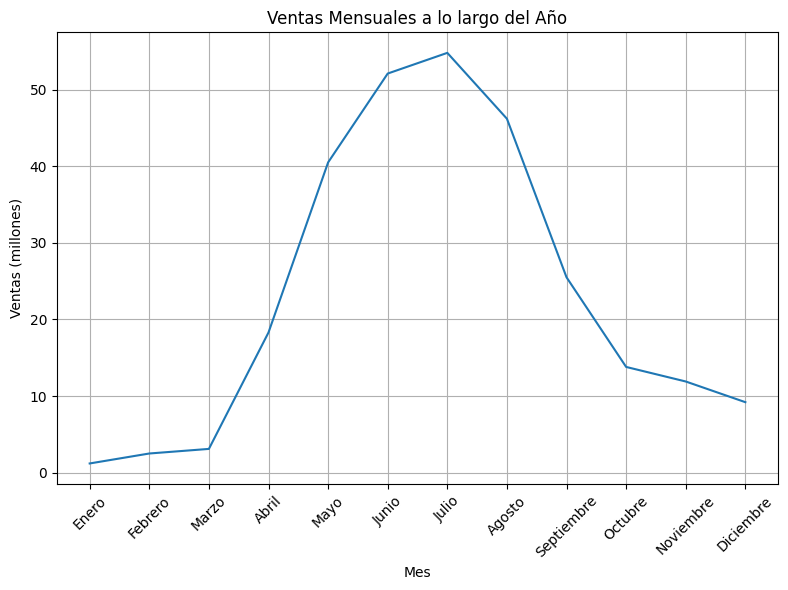

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_ventas, x='Mes', y='Ventas (millones)')
plt.title('Ventas Mensuales a lo largo del Año')
plt.xlabel('Mes')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Resumen de los hallazgos del análisis de ventas:  

Basado en el análisis de los datos de ventas mensuales:

*   **Medidas de Tendencia Central:**  

    *   La **media** de ventas fueron aproximadamente  **23.26 millones**.  
    Este es el valor promedio de ventas mensuales durante el año.  

    *   La **mediana** de ventas fueron aproximadamente **16.05 millones**.   
    Este es el valor medio cuando se ordenan las ventas, y se ve menos afectado por las mayores ventas en los meses pico, en comparación con la media.

    *   **NO HAY MODA** para este conjunto de datos, porque no hay valores de ventas repetidos.

*   **Medidas de Dispersión:**  

    *   El **range** de ventas fué **53.60 millones**, indicando una gran diferencia entre las ventas mensuales más altas y las más bajas.

    *   La **varianza** fué aproximadamente **368.32**, y la ** Desviación Standard ** fué aproximadamente **19.19**. Estos valores muestran una importante dispersión o variabilidad en los datos de ventas mensuales.

*   **Estacionalidad:**
    *   El gráfico de lineas muestra claramente una fuerte **Tendencia estacional**, con ventas aumentando significativamente de mayo a agosto y disminuyendo en otros meses.

    *  Las **mayores ventas** se produjeron en **Julio** (54.8 milliones), y las **menores ventas** se produjeron en **Enero** (1.2 milliones).

    *   Este pico distintivo durante el período mayo-agosto sugiere que es probable que el producto sea estacional, y que su demanda esté vinculada a una época específica del año.

*   **Tipos de productos potenciales:**
    *   Considerando el fuerte pico estacional en mayo-agosto, si los datos son del **Hemisferio Norte**, el producto probablemente podría ser **Bronceador** .
    *   Si los datos son del **Hemisferio Sur**, el producto podría ser **Bufandas**.

En general, los datos de ventas muestran un patrón estacional claro, con un pico significativo durante el período mayo-agosto, que domina la tendencia general de ventas e influye en las medidas de tendencia central y de dispersión.

In [6]:
# Encontrar el mes con las mayores ventas
max_ventas_mes = df_ventas.loc[df_ventas['Ventas (millones)'].idxmax()]
print(f"Mes con las mayores ventas:\n{max_ventas_mes}\n")

# Encontrar el mes con las mayores ventas
min_ventas_mes = df_ventas.loc[df_ventas['Ventas (millones)'].idxmin()]
print(f"Mes con las menores ventas:\n{min_ventas_mes}")

Mes con las mayores ventas:
Mes                  Julio
Ventas (millones)     54.8
Name: 6, dtype: object

Mes con las menores ventas:
Mes                  Enero
Ventas (millones)      1.2
Name: 0, dtype: object


Teorizá a partir de las dos actividades:  
Si tuvieras que adivinar de qué producto se trata,   

¿cuál crees que se ajusta más a los valores obtenidos? Justificá tu elección.  
[ ] Leche  
[x] Bufanda  
[ ] Árbol de navidad  
[ ] Kit de geometría escolar  
[x] Bronceador  


### Conclusión:  

El aumento de las ventas entre mayo y agosto sugiere una venta estacional.  
Coincidiendo con el invierno en el hemisferio Sur. Lo cual podria ser por ej: "Bufandas"    
Como no conocemos la procedencia de los datos, podria ser ventas de verano en el hemisferio Norte y corresponder por ej: "Bronceador"